✓ Dataset loaded successfully
RWANDA DHS DATASET - DATA QUALITY ASSESSMENT

1. DATASET DIMENSIONS VERIFICATION
----------------------------------------
Actual dimensions: 14,634 rows × 44 columns
Documentation claim: 14,634 rows × 44 columns
✓ Row count matches documentation
✓ Column count matches documentation

2. TARGET VARIABLE VALIDATION
----------------------------------------
Target Variable Distribution:
  0.0: 7,919 cases (54.1%)
  1.0: 6,715 cases (45.9%)

Valid Cases Only (excluding NaN):
  Early debut (1.0): 45.9% of valid cases
  Late debut (0.0): 54.1% of valid cases

3. LITERATURE COMPARISON
----------------------------------------
Observed early debut rate: 45.9%
Documentation claim: 27.1%
Problem statement claim: 45.9%
⚠️  Deviates from documentation by 18.8 percentage points

4. DATA LEAKAGE ASSESSMENT
----------------------------------------
Leakage variables present: ['v525', 'v512', 'v511', 'v212']
Leakage variables missing: []
✓ Confirmed: early_sexual_debut perfec

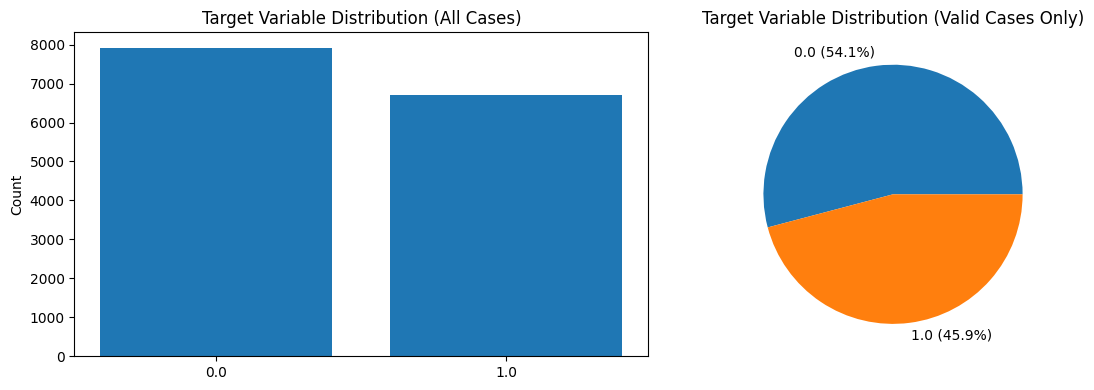

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Define excluded features due to data leakage
exclude_features = [
    'v525',  # Direct source of target variable
    'v512',  # Age at first marriage  
    'v511',  # Age at first cohabitation
    'v212'   # Age at first birth
]

def load_and_assess_data():
    """
    Phase 1.1: Data Quality Assessment for Rwanda DHS Dataset
    """
    
    # Load the dataset
    dataset_path = Path(r"C:\Users\USER\Desktop\seraphine_thesis\findatasets\rwanda_dhs_merged.csv")
    
    try:
        df = pd.read_csv(dataset_path)
        print("✓ Dataset loaded successfully")
    except FileNotFoundError:
        print("✗ Dataset not found at specified path")
        return None
    
    print("="*80)
    print("RWANDA DHS DATASET - DATA QUALITY ASSESSMENT")
    print("="*80)
    
    # 1. Verify dataset dimensions
    print("\n1. DATASET DIMENSIONS VERIFICATION")
    print("-" * 40)
    actual_rows, actual_cols = df.shape
    print(f"Actual dimensions: {actual_rows:,} rows × {actual_cols} columns")
    print(f"Documentation claim: 14,634 rows × 44 columns")
    
    # Check discrepancies
    if actual_rows != 14634:
        print(f"⚠️  ROW MISMATCH: Found {actual_rows:,} rows, expected 14,634")
        if actual_rows > 1000000:
            print(f"   Note: {actual_rows:,} rows suggests processed/expanded dataset")
    else:
        print("✓ Row count matches documentation")
    
    if actual_cols != 44:
        print(f"⚠️  COLUMN MISMATCH: Found {actual_cols} columns, expected 44")
    else:
        print("✓ Column count matches documentation")
    
    # 2. Validate target variable
    print("\n2. TARGET VARIABLE VALIDATION")
    print("-" * 40)
    
    if 'early_sexual_debut' not in df.columns:
        print("✗ Target variable 'early_sexual_debut' not found!")
        print(f"Available columns: {list(df.columns)}")
        return None
    
    # Target variable distribution
    target_counts = df['early_sexual_debut'].value_counts(dropna=False)
    target_prop = df['early_sexual_debut'].value_counts(normalize=True, dropna=False) * 100
    
    print("Target Variable Distribution:")
    for value, count in target_counts.items():
        percentage = target_prop[value]
        print(f"  {value}: {count:,} cases ({percentage:.1f}%)")
    
    # Calculate valid case proportions (excluding NaN)
    valid_cases = df['early_sexual_debut'].dropna()
    if len(valid_cases) > 0:
        early_prop = (valid_cases == 1.0).mean() * 100
        late_prop = (valid_cases == 0.0).mean() * 100
        
        print(f"\nValid Cases Only (excluding NaN):")
        print(f"  Early debut (1.0): {early_prop:.1f}% of valid cases")
        print(f"  Late debut (0.0): {late_prop:.1f}% of valid cases")
        
        # Cross-check with literature
        print(f"\n3. LITERATURE COMPARISON")
        print("-" * 40)
        print(f"Observed early debut rate: {early_prop:.1f}%")
        print(f"Documentation claim: 27.1%")
        print(f"Problem statement claim: 45.9%")
        
        if abs(early_prop - 27.1) < 2:
            print("✓ Matches documentation (27.1%)")
        else:
            print(f"⚠️  Deviates from documentation by {abs(early_prop - 27.1):.1f} percentage points")
            
        if abs(early_prop - 45.9) > 10:
            print(f"⚠️  Major discrepancy with problem statement (45.9%)")
            print("   This suggests different definitions or populations")
    
    # 4. Check for leakage variables
    print(f"\n4. DATA LEAKAGE ASSESSMENT")
    print("-" * 40)
    present_leakage_vars = [var for var in exclude_features if var in df.columns]
    missing_leakage_vars = [var for var in exclude_features if var not in df.columns]
    
    print(f"Leakage variables present: {present_leakage_vars}")
    print(f"Leakage variables missing: {missing_leakage_vars}")
    
    # Analyze relationships for present leakage variables
    if 'v525' in df.columns and 'early_sexual_debut' in df.columns:
        # Perfect correlation check
        correlation_check = df[['v525', 'early_sexual_debut']].dropna()
        if len(correlation_check) > 0:
            # Check if early_sexual_debut perfectly derived from v525
            early_from_v525 = (correlation_check['v525'] < 18).astype(float)
            perfect_match = (early_from_v525 == correlation_check['early_sexual_debut']).all()
            
            if perfect_match:
                print("✓ Confirmed: early_sexual_debut perfectly derived from v525 < 18")
            else:
                print("⚠️  early_sexual_debut derivation from v525 may have inconsistencies")
    
    # 5. Missing data assessment
    print(f"\n5. MISSING DATA PATTERNS")
    print("-" * 40)
    
    missing_summary = df.isnull().sum()
    missing_pct = (missing_summary / len(df)) * 100
    
    print("Variables with missing data (>1%):")
    for var in missing_summary.index:
        if missing_pct[var] > 1:
            print(f"  {var}: {missing_summary[var]:,} ({missing_pct[var]:.1f}%)")
    
    # 6. Data type assessment
    print(f"\n6. DATA TYPE ASSESSMENT")
    print("-" * 40)
    
    print("Data types:")
    dtype_summary = df.dtypes.value_counts()
    for dtype, count in dtype_summary.items():
        print(f"  {dtype}: {count} variables")
    
    # Check target variable type
    target_dtype = df['early_sexual_debut'].dtype
    print(f"\nTarget variable type: {target_dtype}")
    if target_dtype == 'float64':
        print("  Recommendation: Convert to Int8 for ML efficiency")
    
    # 7. Summary of data quality issues
    print(f"\n7. DATA QUALITY SUMMARY")
    print("-" * 40)
    
    issues = []
    
    if actual_rows != 14634:
        issues.append(f"Row count mismatch ({actual_rows:,} vs 14,634 expected)")
    
    if len(valid_cases) > 0:
        if abs(early_prop - 45.9) > 10:
            issues.append("Major discrepancy with problem statement prevalence (45.9%)")
    
    if len(present_leakage_vars) > 1:  # v525 expected, others problematic
        issues.append(f"Multiple potential leakage variables present: {present_leakage_vars}")
    
    if len(issues) == 0:
        print("✓ No critical data quality issues identified")
    else:
        print("⚠️  Issues requiring attention:")
        for issue in issues:
            print(f"  - {issue}")
    
    # Return dataset for further analysis
    return df

# Execute the assessment
if __name__ == "__main__":
    dataset = load_and_assess_data()
    
    if dataset is not None:
        print(f"\n" + "="*80)
        print("DATA ASSESSMENT COMPLETE")
        print(f"Dataset shape: {dataset.shape}")
        print(f"Excluded features for ML: {exclude_features}")
        print("="*80)
    
    # Optional: Create visualizations
    if dataset is not None and 'early_sexual_debut' in dataset.columns:
        
        # Target variable distribution plot
        plt.figure(figsize=(12, 4))
        
        plt.subplot(1, 2, 1)
        target_counts = dataset['early_sexual_debut'].value_counts(dropna=False)
        plt.bar(range(len(target_counts)), target_counts.values)
        plt.xticks(range(len(target_counts)), [str(x) for x in target_counts.index])
        plt.title('Target Variable Distribution (All Cases)')
        plt.ylabel('Count')
        
        plt.subplot(1, 2, 2)
        valid_target = dataset['early_sexual_debut'].dropna()
        if len(valid_target) > 0:
            valid_counts = valid_target.value_counts()
            plt.pie(valid_counts.values, labels=[f'{x} ({valid_counts[x]/len(valid_target)*100:.1f}%)' 
                                                for x in valid_counts.index], autopct='')
            plt.title('Target Variable Distribution (Valid Cases Only)')
        
        plt.tight_layout()
        plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
import warnings
warnings.filterwarnings('ignore')

def data_preprocessing(df, exclude_features, target_strategy='binary'):
    """
    Phase 1.2: Data Preprocessing for Rwanda DHS Dataset
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Raw dataset
    exclude_features : list
        Features to exclude due to data leakage
    target_strategy : str
        'binary' - exclude never-had-sex cases
        'three_class' - encode as Early/Late/Never
    """
    
    print("="*80)
    print("PHASE 1.2: DATA PREPROCESSING")
    print("="*80)
    
    # Create working copy
    df_processed = df.copy()
    
    print(f"Starting dataset shape: {df_processed.shape}")
    print(f"Excluded features: {exclude_features}")
    print(f"Target strategy: {target_strategy}")
    
    # ================================================================
    # 1.2.1 HANDLE MISSING VALUES
    # ================================================================
    
    print("\n" + "="*60)
    print("1.2.1 MISSING VALUE HANDLING")
    print("="*60)
    
    # Analyze missing patterns before processing
    missing_before = df_processed.isnull().sum()
    missing_pct_before = (missing_before / len(df_processed)) * 100
    
    print("Missing data summary (>1% missing):")
    high_missing = missing_pct_before[missing_pct_before > 1].sort_values(ascending=False)
    for var, pct in high_missing.items():
        count = missing_before[var]
        print(f"  {var}: {count:,} ({pct:.1f}%)")
    
    # Handle target variable based on strategy
    print(f"\n1.2.1.1 TARGET VARIABLE PROCESSING ({target_strategy})")
    print("-" * 40)
    
    target_before = df_processed['early_sexual_debut'].value_counts(dropna=False)
    print("Target variable before processing:")
    for val, count in target_before.items():
        pct = (count / len(df_processed)) * 100
        print(f"  {val}: {count:,} ({pct:.1f}%)")
    
    if target_strategy == 'binary':
        # Exclude cases where early_sexual_debut is NaN (never had sex)
        df_processed = df_processed.dropna(subset=['early_sexual_debut'])
        print(f"\nAfter excluding never-had-sex cases: {df_processed.shape[0]:,} records")
        
        # Convert to integer for efficiency
        df_processed['early_sexual_debut'] = df_processed['early_sexual_debut'].astype(int)
        
    elif target_strategy == 'three_class':
        # Encode NaN as 2 (Never), 1.0 as 1 (Early), 0.0 as 0 (Late)
        df_processed['early_sexual_debut'] = df_processed['early_sexual_debut'].fillna(2)
        df_processed['early_sexual_debut'] = df_processed['early_sexual_debut'].astype(int)
        print("Three-class encoding: 0=Late debut, 1=Early debut, 2=Never had sex")
    
    target_after = df_processed['early_sexual_debut'].value_counts(dropna=False)
    print("Target variable after processing:")
    for val, count in target_after.items():
        pct = (count / len(df_processed)) * 100
        print(f"  {val}: {count:,} ({pct:.1f}%)")
    
    # Remove excluded features
    print(f"\n1.2.1.2 REMOVING LEAKAGE FEATURES")
    print("-" * 40)
    
    features_to_remove = [f for f in exclude_features if f in df_processed.columns]
    print(f"Removing features: {features_to_remove}")
    
    df_processed = df_processed.drop(columns=features_to_remove)
    print(f"Dataset shape after feature removal: {df_processed.shape}")
    
    # Impute missing values for other variables
    print(f"\n1.2.1.3 IMPUTATION STRATEGY")
    print("-" * 40)
    
    # Identify variable types for appropriate imputation
    numeric_vars = df_processed.select_dtypes(include=[np.number]).columns.tolist()
    numeric_vars = [var for var in numeric_vars if var != 'early_sexual_debut']
    
    categorical_vars = df_processed.select_dtypes(include=['object']).columns.tolist()
    
    # Remove ID variables from imputation
    id_vars = ['caseid', 'household_id', 'v001', 'v002']
    numeric_vars = [var for var in numeric_vars if var not in id_vars]
    categorical_vars = [var for var in categorical_vars if var not in id_vars]
    
    print(f"Numeric variables for imputation: {len(numeric_vars)}")
    print(f"Categorical variables for imputation: {len(categorical_vars)}")
    
    # Numeric imputation - use median for robustness
    if len(numeric_vars) > 0:
        numeric_imputer = SimpleImputer(strategy='median')
        df_processed[numeric_vars] = numeric_imputer.fit_transform(df_processed[numeric_vars])
        print("Applied median imputation to numeric variables")
    
    # Categorical imputation - use mode
    if len(categorical_vars) > 0:
        categorical_imputer = SimpleImputer(strategy='most_frequent')
        df_processed[categorical_vars] = categorical_imputer.fit_transform(df_processed[categorical_vars])
        print("Applied mode imputation to categorical variables")
    
    # ================================================================
    # 1.2.2 FEATURE ENGINEERING
    # ================================================================
    
    print("\n" + "="*60)
    print("1.2.2 FEATURE ENGINEERING")
    print("="*60)
    
    # Create binary indicators from categorical variables
    print("\n1.2.2.1 BINARY INDICATORS FROM CATEGORICAL VARIABLES")
    print("-" * 50)
    
    # Education level (v106) - Primary/Secondary/Higher vs None
    if 'v106' in df_processed.columns:
        df_processed['has_education'] = (df_processed['v106'] > 0).astype(int)
        df_processed['has_secondary_plus'] = (df_processed['v106'] >= 2).astype(int)
        print("Created education indicators: has_education, has_secondary_plus")
    
    # Religion (v130) - Major religions
    if 'v130' in df_processed.columns:
        df_processed['is_catholic'] = (df_processed['v130'] == 1).astype(int)
        df_processed['is_protestant'] = (df_processed['v130'] == 2).astype(int)
        df_processed['is_muslim'] = (df_processed['v130'] == 4).astype(int)
        print("Created religion indicators: is_catholic, is_protestant, is_muslim")
    
    # Marital status (v501) - Ever married
    if 'v501' in df_processed.columns:
        df_processed['ever_married'] = (df_processed['v501'] > 0).astype(int)
        df_processed['currently_married'] = (df_processed['v501'] == 1).astype(int)
        print("Created marital indicators: ever_married, currently_married")
    
    # Employment (v714)
    if 'v714' in df_processed.columns:
        df_processed['is_employed'] = df_processed['v714'].astype(int)
        print("Created employment indicator: is_employed")
    
    # Household assets
    asset_vars = ['hv206', 'hv207', 'hv208']  # electricity, radio, TV
    asset_names = ['has_electricity', 'has_radio', 'has_tv']
    
    for asset_var, asset_name in zip(asset_vars, asset_names):
        if asset_var in df_processed.columns:
            df_processed[asset_name] = df_processed[asset_var].astype(int)
    
    # Asset count
    if all(var in df_processed.columns for var in asset_names):
        df_processed['total_assets'] = df_processed[asset_names].sum(axis=1)
        print("Created asset indicators and total_assets count")
    
    # Scale continuous variables
    print("\n1.2.2.2 SCALING CONTINUOUS VARIABLES")
    print("-" * 40)
    
    continuous_to_scale = ['v107', 'v191', 'hv271']  # education years, wealth scores
    continuous_present = [var for var in continuous_to_scale if var in df_processed.columns]
    
    if len(continuous_present) > 0:
        scaler = StandardScaler()
        
        # Create scaled versions
        scaled_names = [f"{var}_scaled" for var in continuous_present]
        df_processed[scaled_names] = scaler.fit_transform(df_processed[continuous_present])
        
        print(f"Scaled variables: {continuous_present}")
        print(f"New scaled variables: {scaled_names}")
        
        # Store scaler for later use
        scaling_info = {
            'scaler': scaler,
            'original_vars': continuous_present,
            'scaled_vars': scaled_names
        }
    else:
        scaling_info = None
    
    # Generate interaction terms for key predictors
    print("\n1.2.2.3 INTERACTION TERMS")
    print("-" * 30)
    
    interactions_created = []
    
    # Age × Education interaction
    if 'v012' in df_processed.columns and 'v107' in df_processed.columns:
        df_processed['age_education_interaction'] = df_processed['v012'] * df_processed['v107']
        interactions_created.append('age_education_interaction')
    
    # Age × Wealth interaction  
    if 'v012' in df_processed.columns and 'v191' in df_processed.columns:
        df_processed['age_wealth_interaction'] = df_processed['v012'] * df_processed['v191']
        interactions_created.append('age_wealth_interaction')
    
    # Education × Wealth interaction
    if 'v107' in df_processed.columns and 'v191' in df_processed.columns:
        df_processed['education_wealth_interaction'] = df_processed['v107'] * df_processed['v191']
        interactions_created.append('education_wealth_interaction')
    
    # Urban × Education interaction
    if 'v102' in df_processed.columns and 'v107' in df_processed.columns:
        df_processed['urban_education_interaction'] = df_processed['v102'] * df_processed['v107']
        interactions_created.append('urban_education_interaction')
    
    print(f"Created interaction terms: {interactions_created}")
    
    # ================================================================
    # 1.2.3 GEOGRAPHIC STRATIFICATION
    # ================================================================
    
    print("\n" + "="*60)
    print("1.2.3 GEOGRAPHIC STRATIFICATION")
    print("="*60)
    
    # Create region indicators
    if 'v101' in df_processed.columns:
        print("\n1.2.3.1 REGIONAL INDICATORS")
        print("-" * 30)
        
        region_names = {1: 'kigali', 2: 'south', 3: 'west', 4: 'north', 5: 'east'}
        
        for region_code, region_name in region_names.items():
            col_name = f'region_{region_name}'
            df_processed[col_name] = (df_processed['v101'] == region_code).astype(int)
        
        region_distribution = df_processed['v101'].value_counts().sort_index()
        print("Regional distribution:")
        for region_code, count in region_distribution.items():
            region_name = region_names.get(region_code, f'Unknown_{region_code}')
            pct = (count / len(df_processed)) * 100
            print(f"  {region_name.title()}: {count:,} ({pct:.1f}%)")
        
        print(f"Created regional dummy variables: {list(region_names.values())}")
    
    # Urban/rural stratification
    if 'v102' in df_processed.columns:
        print("\n1.2.3.2 URBAN/RURAL STRATIFICATION")
        print("-" * 35)
        
        df_processed['is_urban'] = (df_processed['v102'] == 1).astype(int)
        df_processed['is_rural'] = (df_processed['v102'] == 2).astype(int)
        
        urban_rural_dist = df_processed['v102'].value_counts()
        print("Urban/Rural distribution:")
        print(f"  Urban: {urban_rural_dist.get(1, 0):,} ({urban_rural_dist.get(1, 0)/len(df_processed)*100:.1f}%)")
        print(f"  Rural: {urban_rural_dist.get(2, 0):,} ({urban_rural_dist.get(2, 0)/len(df_processed)*100:.1f}%)")
        
        print("Created urban/rural indicators: is_urban, is_rural")
    
    # ================================================================
    # 1.2.4 FINAL PREPROCESSING SUMMARY
    # ================================================================
    
    print("\n" + "="*60)
    print("1.2.4 PREPROCESSING SUMMARY")
    print("="*60)
    
    # Data shape summary
    print(f"Final dataset shape: {df_processed.shape}")
    print(f"Records processed: {df_processed.shape[0]:,}")
    print(f"Features available: {df_processed.shape[1]:,}")
    
    # Feature categories
    feature_summary = {
        'target': ['early_sexual_debut'],
        'demographics': ['v012', 'v013'],
        'geographic': ['v101', 'v102'] + [col for col in df_processed.columns if col.startswith('region_') or col.startswith('is_urban') or col.startswith('is_rural')],
        'education': ['v106', 'v107', 'v149', 'v150', 'v151', 'v152'] + [col for col in df_processed.columns if 'education' in col],
        'socioeconomic': ['v130', 'v190', 'v191', 'hv270', 'hv271'] + [col for col in df_processed.columns if any(x in col for x in ['wealth', 'religion', 'catholic', 'protestant', 'muslim'])],
        'household': ['hv009'] + [col for col in df_processed.columns if any(x in col for x in ['asset', 'electricity', 'radio', 'tv'])],
        'marital': ['v501', 'v502'] + [col for col in df_processed.columns if 'married' in col],
        'fertility': ['v201', 'v213', 'bord', 'b5'],
        'family_planning': ['v301', 'v312', 'v602'],
        'health': ['v157', 'v158', 'v384a', 'v384b'],
        'employment': ['v714'] + [col for col in df_processed.columns if 'employed' in col],
        'interactions': interactions_created,
        'scaled': scaled_names if scaling_info else []
    }
    
    print("\nFeature categories:")
    total_features = 0
    for category, features in feature_summary.items():
        available_features = [f for f in features if f in df_processed.columns]
        if available_features:
            print(f"  {category.title()}: {len(available_features)} features")
            total_features += len(available_features)
    
    print(f"\nTotal categorized features: {total_features}")
    
    # Missing data after preprocessing
    missing_after = df_processed.isnull().sum().sum()
    print(f"Missing values after preprocessing: {missing_after:,}")
    
    if missing_after == 0:
        print("✓ All missing values handled successfully")
    else:
        print(f"  {missing_after} missing values remain")
    
    # Data types summary
    print(f"\nData types summary:")
    dtype_counts = df_processed.dtypes.value_counts()
    for dtype, count in dtype_counts.items():
        print(f"  {dtype}: {count} variables")
    
    # Memory usage
    memory_mb = df_processed.memory_usage(deep=True).sum() / 1024**2
    print(f"\nMemory usage: {memory_mb:.1f} MB")
    
    return df_processed, {
        'scaling_info': scaling_info,
        'feature_summary': feature_summary,
        'target_strategy': target_strategy,
        'interactions_created': interactions_created,
        'preprocessing_stats': {
            'original_shape': df.shape,
            'final_shape': df_processed.shape,
            'missing_before': missing_before.sum(),
            'missing_after': missing_after,
            'memory_mb': memory_mb
        }
    }

# Execute preprocessing
if __name__ == "__main__":
    # Load data
    dataset_path = r"C:\Users\USER\Desktop\MUKABUGINGO_THESIS_CODES\rwanda_dhs_merged.csv"
    exclude_features = ['v525', 'v512', 'v511', 'v212']
    
    try:
        df = pd.read_csv(dataset_path)
        print("Dataset loaded for preprocessing")
        
        # Run preprocessing with binary classification strategy
        df_processed, preprocessing_info = data_preprocessing(
            df, 
            exclude_features, 
            target_strategy='binary'  # Change to 'three_class' if needed
        )
        
        print("\n" + "="*80)
        print("PREPROCESSING COMPLETE")
        print("="*80)
        print(f"Ready for modeling with {df_processed.shape[0]:,} samples and {df_processed.shape[1]:,} features")
        
        # Display first few rows to verify
        print("\nSample of processed data:")
        print(df_processed.head())
        
        # Save processed data
        output_path = r"C:/Users/USER/Desktop/MUKABUGINGO_THESIS_CODES/ANALYSIS/rwanda_dhs_processed.csv"
        
        df_processed.to_csv(output_path, index=False)
        print(f"\nProcessed data saved to: {output_path}")
        
    except FileNotFoundError:
        print("Dataset not found. Please ensure the file path is correct.")
    except Exception as e:
        print(f"Error during preprocessing: {e}")

Dataset loaded for preprocessing
PHASE 1.2: DATA PREPROCESSING
Starting dataset shape: (14634, 44)
Excluded features: ['v525', 'v512', 'v511', 'v212']
Target strategy: binary

1.2.1 MISSING VALUE HANDLING
Missing data summary (>1% missing):
  v511: 6,060 (41.4%)
  v512: 6,060 (41.4%)
  v212: 5,420 (37.0%)
  v107: 1,352 (9.2%)

1.2.1.1 TARGET VARIABLE PROCESSING (binary)
----------------------------------------
Target variable before processing:
  0.0: 7,919 (54.1%)
  1.0: 6,715 (45.9%)

After excluding never-had-sex cases: 14,634 records
Target variable after processing:
  0: 7,919 (54.1%)
  1: 6,715 (45.9%)

1.2.1.2 REMOVING LEAKAGE FEATURES
----------------------------------------
Removing features: ['v525', 'v512', 'v511', 'v212']
Dataset shape after feature removal: (14634, 40)

1.2.1.3 IMPUTATION STRATEGY
----------------------------------------
Numeric variables for imputation: 35
Categorical variables for imputation: 0
Applied median imputation to numeric variables

1.2.2 FEATUR